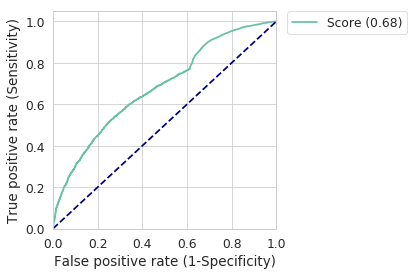

SpearmanrResult(correlation=0.5388515733226185, pvalue=2.3750350418632384e-240)

In [3]:
import pandas as pd
import sys
import os
root_dir = os.path.abspath(os.path.join(os.getcwd(), "../.."))
os.chdir(root_dir)

import functions

#Datasets
pET = pd.read_pickle('results/pET_complete.pkl.gz', compression='infer')
ecoli_w3110 = pd.read_pickle('results/ecoli.pkl.gz', compression='infer')
pET['Accession'] = pET['Accession'].apply(lambda x:x.split('_')[0])



protein_sol_pET21 = pd.read_csv('Testing_other_tools/protein_sol/pET21_NESG_protein-sol.txt', sep='\t', header=None)
protein_sol_pET15 = pd.read_csv('Testing_other_tools/protein_sol/protein-sol_pET15_NESG.txt', sep='\t', header=None)
protein_sol_ecoli = pd.read_csv('Testing_other_tools/protein_sol/protein-sol_ecoli_W3110_tags.txt', sep='\t', header=None)

#merge pET
protein_sol_pET = pd.concat([protein_sol_pET15, protein_sol_pET21])


#Rename cols
protein_sol_pET = protein_sol_pET.rename(columns={0:'Accession', 1:'Score'})
protein_sol_ecoli = protein_sol_ecoli.rename(columns={0:'JW', 1:'Score'})

protein_sol_pET.shape, pET.shape, ecoli_w3110.shape, protein_sol_ecoli.shape

#merge results with cleaned dataset
df_pET = pET.merge(protein_sol_pET, on="Accession")
df_ecoli = ecoli_w3110.merge(protein_sol_ecoli, on="JW")


#ROC for pET

df = df_pET[['Score']].copy()

labels = df_pET['Solubility'].values
functions.make_roc(df, labels)

#Correlation for ecoli
from scipy.stats import spearmanr

spearmanr(df_ecoli['Score'], df_ecoli['Solubility(%)'])

In [2]:
df_pET.shape, df_ecoli.shape

((12216, 7), (3198, 6))

In [4]:
#cross validation sets
def compute_auc(df, labels):
    preds = df['Score'].values
    fpr, tpr, _ = functions.roc_curve(labels, preds)
    a = functions.auc(fpr, tpr)
    if a < 0.5:
        a = 1 - a
    return a


cv_10 = pd.read_pickle('results/testing_10_with_tag.pkl')
cv_40 = pd.read_pickle('results/testing_40_with_tag.pkl')
cv_90 = pd.read_pickle('results/testing_90_with_tag.pkl')


In [5]:


all_aucs_test_proteinsol_10 = []
for i, v in enumerate(cv_10):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(protein_sol_pET, on="Accession")
    temp = v.merge(protein_sol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(protein_sol_pET, on="Accession")['Solubility'].values
    all_aucs_test_proteinsol_10.append(compute_auc(temp, labels))
all_aucs_test_proteinsol_10

[0.7054460881500686,
 0.667889021006738,
 0.7283977225784436,
 0.6244890317346398,
 0.6740653616205443,
 0.6627905574482197,
 0.6596430269913522,
 0.6738998247165215,
 0.6906058034753926,
 0.7317141662367947]

In [6]:
functions.np.mean(all_aucs_test_proteinsol_10), functions.np.std(all_aucs_test_proteinsol_10)

(0.6818940603958715, 0.031228117308203882)

In [3]:
all_aucs_test_proteinsol_40 = []
for i, v in enumerate(cv_40):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(protein_sol_pET, on="Accession")
    temp = v.merge(protein_sol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(protein_sol_pET, on="Accession")['Solubility'].values
    all_aucs_test_proteinsol_40.append(compute_auc(temp, labels))
all_aucs_test_proteinsol_40

[0.6526756106674139,
 0.7006622911694511,
 0.7135833513591463,
 0.7099738892572943,
 0.6530996849684968,
 0.696177749557454,
 0.6616303307197305,
 0.6988604348976002,
 0.6646463296468308,
 0.6598950189859281]

In [5]:
functions.np.mean(all_aucs_test_proteinsol_40), functions.np.std(all_aucs_test_proteinsol_40)

(0.6811204691229347, 0.023464284098085618)

In [6]:

all_aucs_test_proteinsol_90 = []
for i, v in enumerate(cv_90):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(protein_sol_pET, on="Accession")
    temp = v.merge(protein_sol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(protein_sol_pET, on="Accession")['Solubility'].values
    all_aucs_test_proteinsol_90.append(compute_auc(temp, labels))
all_aucs_test_proteinsol_90

[0.6915776986951365,
 0.6657182188026203,
 0.7105165117990209,
 0.6556597403664931,
 0.6871973803430352,
 0.6733975563909773,
 0.6546866779855565,
 0.6931609041776894,
 0.694582589445119,
 0.6963072050673]

In [7]:
functions.np.mean(all_aucs_test_proteinsol_90), functions.np.std(all_aucs_test_proteinsol_90)

(0.6822804483072948, 0.01788199858923717)